In [1]:
import numpy as np
import pandas as pd
import tenseal as ts
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tenseal as ts
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
import psutil
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage


In [2]:
df=pd.read_csv(r"C:\Users\Sarnika\OneDrive\Desktop\sem 5\ml\archive (3)\heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df = df.drop('id', axis=1)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("\n\nNumber of duplicates:", df.duplicated().sum())

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Number of duplicates: 2


In [5]:
# Fill missing values with the median for numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0]).astype('category')

df

# infer the types of all columns in the DataFrame
df = df.infer_objects()
df

C:\Users\Sarnika\AppData\Local\Temp\ipykernel_37952\983538608.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0]).astype('category')
C:\Users\Sarnika\AppData\Local\Temp\ipykernel_37952\983538608.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0]).astype('category')


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


In [6]:
print(df.isnull().sum())

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


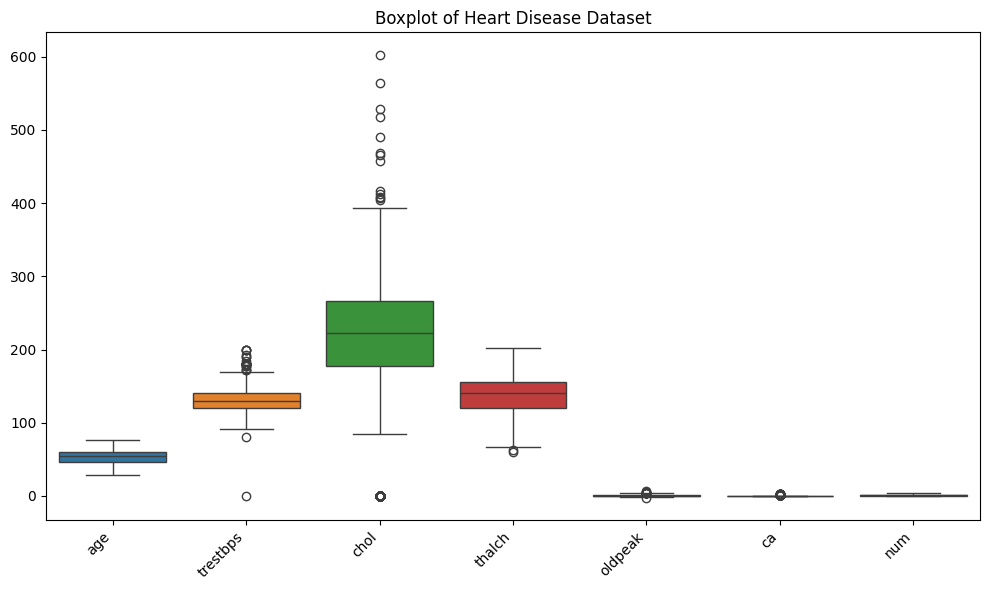

In [7]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Heart Disease Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Outliers in 'age':
 []
Outliers in 'trestbps':
 [172. 180. 200. 174. 178. 192. 180. 178. 180. 190. 180. 180. 180. 180.
 200. 180. 180.  80. 180. 200. 185. 200. 180.   0. 178. 172. 180. 190.]
Outliers in 'chol':
 [417. 407. 564. 409. 412. 468. 466. 529. 603. 404. 518. 491.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  

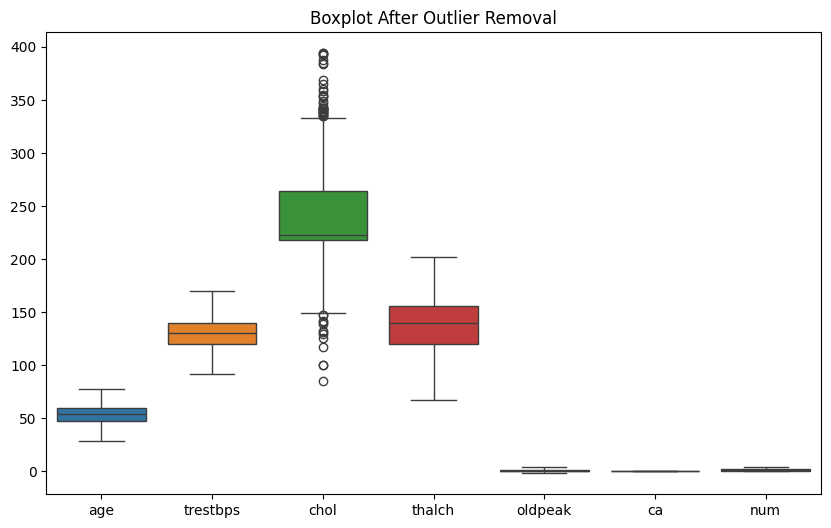

In [8]:
def detect_and_replace_outliers(df, column_name):
    # Check if the column is numeric
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Skipping non-numeric column: {column_name}")
        return df  # Return the DataFrame unchanged

    # Calculate Q1, Q3, and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print outliers for verification
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Outliers in '{column_name}':\n", outliers[column_name].values)

    # Replace outliers with the median directly on the identified rows
    median = df[column_name].median()
    df.loc[df[column_name] < lower_bound, column_name] = median
    df.loc[df[column_name] > upper_bound, column_name] = median

    return df

# Apply the function to each column
for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'exang', 'ca', 'num', 'fbs']:
    df = detect_and_replace_outliers(df, col)

# Display boxplot after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'exang', 'ca', 'num', 'fbs']])
plt.title("Boxplot After Outlier Removal")
plt.show()


In [9]:
# Making a copy of the dataset to apply encoding
data_encoded = df.copy()

# Using one-hot encoding for columns with multiple categories and label encoding for binary categories
# Using pandas get_dummies for one-hot encoding for simplicity

# Label encoding for 'sex' column
data_encoded['sex'] = data_encoded['sex'].map({'Male': 1, 'Female': 0})

# One-hot encoding for other categorical features
data_encoded = pd.get_dummies(data_encoded, columns=['fbs','exang','cp', 'restecg', 'slope', 'thal'], drop_first=True)

data_encoded.head()

,age,sex,dataset,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,Cleveland,145.0,233.0,150.0,2.3,0.0,0,True,False,False,False,True,False,False,False,False,False,False
1,67,1,Cleveland,160.0,286.0,108.0,1.5,0.0,2,False,True,False,False,False,False,False,True,False,True,False
2,67,1,Cleveland,120.0,229.0,129.0,2.6,0.0,1,False,True,False,False,False,False,False,True,False,False,True
3,37,1,Cleveland,130.0,250.0,187.0,3.5,0.0,0,False,False,False,True,False,True,False,False,False,True,False
4,41,0,Cleveland,130.0,204.0,172.0,1.4,0.0,0,False,False,True,False,False,False,False,False,True,True,False


In [10]:
from sklearn.preprocessing import StandardScaler
# Selecting boolean columns
bool_columns = data_encoded.select_dtypes(include=['bool']).columns

# Converting boolean columns to integers (0 and 1)
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)
data_encoded.head()

,age,sex,dataset,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,Cleveland,145.0,233.0,150.0,2.3,0.0,0,1,0,0,0,1,0,0,0,0,0,0
1,67,1,Cleveland,160.0,286.0,108.0,1.5,0.0,2,0,1,0,0,0,0,0,1,0,1,0
2,67,1,Cleveland,120.0,229.0,129.0,2.6,0.0,1,0,1,0,0,0,0,0,1,0,0,1
3,37,1,Cleveland,130.0,250.0,187.0,3.5,0.0,0,0,0,0,1,0,1,0,0,0,1,0
4,41,0,Cleveland,130.0,204.0,172.0,1.4,0.0,0,0,0,1,0,0,0,0,0,1,1,0


In [11]:
# Perform one-hot encoding on the 'dataset' column
data_encoded = pd.get_dummies(data_encoded, columns=['dataset'], prefix=['dataset'])

# Display the first few rows to show the changes
data_encoded.head()

,age,sex,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,63,1,145.0,233.0,150.0,2.3,0.0,0,1,0,...,0,0,0,0,0,0,True,False,False,False
1,67,1,160.0,286.0,108.0,1.5,0.0,2,0,1,...,0,0,1,0,1,0,True,False,False,False
2,67,1,120.0,229.0,129.0,2.6,0.0,1,0,1,...,0,0,1,0,0,1,True,False,False,False
3,37,1,130.0,250.0,187.0,3.5,0.0,0,0,0,...,1,0,0,0,1,0,True,False,False,False
4,41,0,130.0,204.0,172.0,1.4,0.0,0,0,0,...,0,0,0,1,1,0,True,False,False,False


In [12]:
# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

data_encoded.head()

,age,sex,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1.007386,1,0.924535,-0.114864,0.487844,1.591244,0.0,0,1,0,...,0,0,0,0,0,0,True,False,False,False
1,1.432034,1,1.893076,1.085730,-1.200343,0.746132,0.0,2,0,1,...,0,0,1,0,1,0,True,False,False,False
2,1.432034,1,-0.689699,-0.205475,-0.356249,1.908161,0.0,1,0,1,...,0,0,1,0,0,1,True,False,False,False
3,-1.752828,1,-0.044005,0.270232,1.975056,2.858911,0.0,0,0,0,...,1,0,0,0,1,0,True,False,False,False
4,-1.328180,0,-0.044005,-0.771793,1.372132,0.640493,0.0,0,0,0,...,0,0,0,1,1,0,True,False,False,False


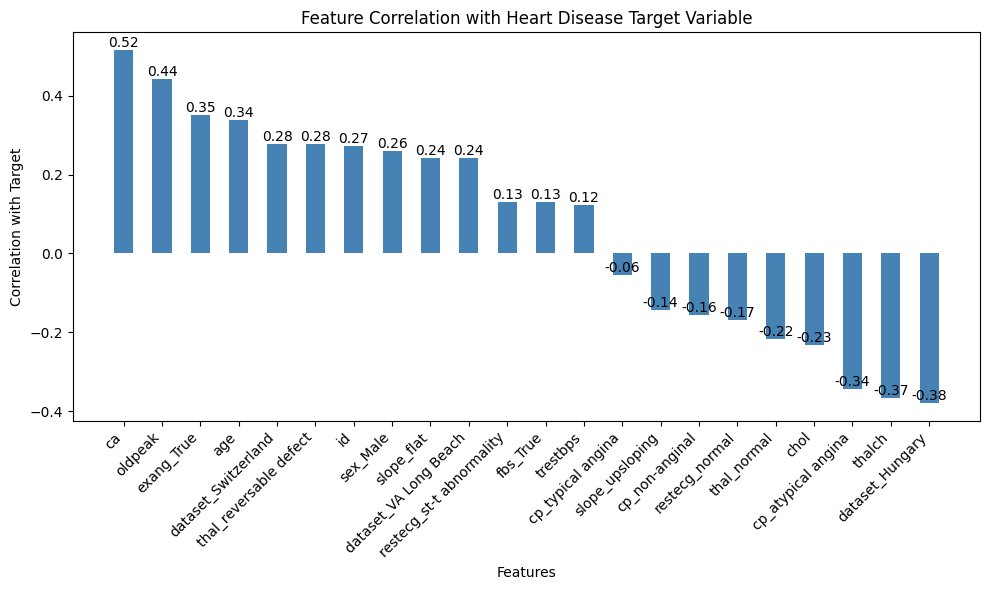

Correlation with target variable:
                                num
ca                        0.516216
oldpeak                   0.443084
exang_True                0.350567
age                       0.339596
dataset_Switzerland       0.278355
thal_reversable defect    0.278313
id                        0.273552
sex_Male                  0.259342
slope_flat                0.242790
dataset_VA Long Beach     0.241977
restecg_st-t abnormality  0.131698
fbs_True                  0.129539
trestbps                  0.122291
cp_typical angina        -0.055896
slope_upsloping          -0.142565
cp_non-anginal           -0.156050
restecg_normal           -0.168173
thal_normal              -0.216512
chol                     -0.231547
cp_atypical angina       -0.343266
thalch                   -0.366265
dataset_Hungary          -0.379413


In [13]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Sarnika\OneDrive\Desktop\sem 5\ml\archive (3)\heart_disease_uci.csv")

# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix[['num']].drop('num').sort_values(by='num', ascending=False)
# Prepare data for plotting
labels = correlation_with_target.index
correlation_values = correlation_with_target['num'].values

# Create a bar plot for the correlations with the target variable
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
index = np.arange(len(labels))

# Create the bar chart
bars = ax.bar(index, correlation_values, bar_width, color='steelblue')

# Adding labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Correlation with Target')
ax.set_title('Feature Correlation with Heart Disease Target Variable')
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate labels for better visibility

# Adding the correlation values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

# Display correlations with the target variable
print("Correlation with target variable:\n", correlation_with_target)




In [14]:
from sklearn.preprocessing import StandardScaler
# Selecting boolean columns
bool_columns = data_encoded.select_dtypes(include=['bool']).columns

# Converting boolean columns to integers (0 and 1)
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)
data_encoded.head()

# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

data_encoded.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,1.007386,0.675287,0.305908,0.480653,1.303159,0.0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,1.432034,1.462483,0.784599,-1.140262,0.569611,3.0,2,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,1.432034,-0.636705,0.269780,-0.329805,1.578239,2.0,1,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,-1.752828,-0.111908,0.459450,1.908602,2.403480,0.0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,-1.328180,-0.111908,0.043982,1.329704,0.477918,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [15]:
from sklearn.model_selection import train_test_split

# Assuming 'data_encoded' is your preprocessed DataFrame and 'num' is the target column
X = data_encoded.drop(columns=['num'])  # Features
y = data_encoded['num']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Convert 'num' into binary classification
df['num_binary'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Check the unique values of the new binary target
print(df['num_binary'].unique())  # This should now be [0, 1]


[0 1]


In [17]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check if the categorical variables are encoded properly
print(df_encoded.head())


   age  trestbps   chol  thalch  oldpeak   ca  num  num_binary  sex_Male  \
0   63     145.0  233.0   150.0      2.3  0.0    0           0      True   
1   67     160.0  286.0   108.0      1.5  0.0    2           1      True   
2   67     120.0  229.0   129.0      2.6  0.0    1           1      True   
3   37     130.0  250.0   187.0      3.5  0.0    0           0      True   
4   41     130.0  204.0   172.0      1.4  0.0    0           0     False   

   dataset_Hungary  ...  cp_non-anginal  cp_typical angina  fbs_True  \
0            False  ...           False               True      True   
1            False  ...           False              False     False   
2            False  ...           False              False     False   
3            False  ...            True              False     False   
4            False  ...           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0           False                     F

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Define features and binary target
X = df_encoded.drop(['num', 'num_binary'], axis=1)  # Drop both the original and binary target columns
y = df_encoded['num_binary']  # Use the new binary target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Test the model
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}")


Accuracy: 82.0652


In [19]:
# Set up CKKS context for encryption with TenSEAL
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)
context.global_scale = 2**40
context.generate_galois_keys()

# Encrypt test data
encrypted_X_test = [ts.ckks_vector(context, row) for row in X_test.to_numpy()]
encrypted_X_test

In [20]:
# Extract model weights and bias, and encrypt them
encrypted_weights = [ts.ckks_vector(context, coef) for coef in log_reg.coef_.tolist()]
encrypted_bias = ts.ckks_vector(context, log_reg.intercept_.tolist())

print('Encrypted weights')
print(encrypted_weights)

print('\n\nEncrypted Bias')
print(encrypted_bias)

Encrypted weights


Encrypted Bias


In [21]:
from sklearn.linear_model import LogisticRegression

# Reconfigure and train the model for binary classification
log_reg = LogisticRegression(multi_class='ovr')  # 'ovr' for binary classification
log_reg.fit(X_train, y_train)

# Extract model weights and bias, and encrypt them
encrypted_weights = [ts.ckks_vector(context, log_reg.coef_[0].tolist())]  # Only one row of coefficients
encrypted_bias = ts.ckks_vector(context, [log_reg.intercept_[0]])         # Single bias value

print('Encrypted weights:', encrypted_weights)
print('Encrypted Bias:', encrypted_bias)

# Define the prediction function (no changes needed)
def encrypted_predict(encrypted_sample, encrypted_weights, encrypted_bias):
    encrypted_dot_product = encrypted_sample.dot(encrypted_weights[0])
    encrypted_result = encrypted_dot_product + encrypted_bias
    return encrypted_result

# Perform encrypted predictions for each sample in the test set
encrypted_predictions = [encrypted_predict(sample, encrypted_weights, encrypted_bias) for sample in encrypted_X_test]

# Decrypt and display results
decrypted_predictions = [enc_pred.decrypt() for enc_pred in encrypted_predictions]
for i, pred in enumerate(decrypted_predictions): 
    print(f"Decrypted Prediction for sample {i+1}: {pred[0]}")  # Only one value per sample



Encrypted weights: [<tenseal.tensors.ckksvector.CKKSVector object at 0x00000242EE0A3320>]
Encrypted Bias: <tenseal.tensors.ckksvector.CKKSVector object at 0x00000242F0369280>


c:\Users\Sarnika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decrypted Prediction for sample 1: -2.5743509028398224
Decrypted Prediction for sample 2: -1.3381953375693723
Decrypted Prediction for sample 3: 2.8924446455604245
Decrypted Prediction for sample 4: 2.308075525602636
Decrypted Prediction for sample 5: 0.8350574478703865
Decrypted Prediction for sample 6: -2.6983752465774264
Decrypted Prediction for sample 7: -1.415440574058261
Decrypted Prediction for sample 8: 6.072065939689461
Decrypted Prediction for sample 9: 2.016740076844934
Decrypted Prediction for sample 10: -1.716978798645583
Decrypted Prediction for sample 11: 2.4406730939313905
Decrypted Prediction for sample 12: 2.6884653860851397
Decrypted Prediction for sample 13: 1.7039699260816268
Decrypted Prediction for sample 14: 1.733765672944631
Decrypted Prediction for sample 15: 0.47776965819689915
Decrypted Prediction for sample 16: -1.9032788017614497
Decrypted Prediction for sample 17: -1.9887072341487722
Decrypted Prediction for sample 18: -0.5221192399356782
Decrypted Predic

In [22]:
# Set threshold for classification
threshold = 0.5

binary_predictions = []
# Perform classification based on decrypted prediction scores
for i, pred in enumerate(decrypted_predictions): 
    prediction_score = 1 / (1 + np.exp(-pred[0]))  # Since each prediction now has a single score
    classification = 1 if prediction_score >= threshold else 0  # Binary classification (1 for "Heart Disease", 0 for "No Heart Disease")
    binary_predictions.append(classification)
    
    # Display prediction result for each sample
    print(f"Sample {i+1}: Score = {prediction_score:.4f} -> Classification = {'Heart Disease' if classification == 1 else 'No Heart Disease'}")

# Calculate accuracy by comparing with actual test labels
accuracy = accuracy_score(y_test, binary_predictions)
print(f"\nAccuracy: {accuracy*100:.2f}")

Sample 1: Score = 0.0708 -> Classification = No Heart Disease
Sample 2: Score = 0.2078 -> Classification = No Heart Disease
Sample 3: Score = 0.9475 -> Classification = Heart Disease
Sample 4: Score = 0.9095 -> Classification = Heart Disease
Sample 5: Score = 0.6974 -> Classification = Heart Disease
Sample 6: Score = 0.0631 -> Classification = No Heart Disease
Sample 7: Score = 0.1954 -> Classification = No Heart Disease
Sample 8: Score = 0.9977 -> Classification = Heart Disease
Sample 9: Score = 0.8825 -> Classification = Heart Disease
Sample 10: Score = 0.1523 -> Classification = No Heart Disease
Sample 11: Score = 0.9199 -> Classification = Heart Disease
Sample 12: Score = 0.9363 -> Classification = Heart Disease
Sample 13: Score = 0.8461 -> Classification = Heart Disease
Sample 14: Score = 0.8499 -> Classification = Heart Disease
Sample 15: Score = 0.6172 -> Classification = Heart Disease
Sample 16: Score = 0.1297 -> Classification = No Heart Disease
Sample 17: Score = 0.1204 -> Cl

Text(0.5, 1.0, 'Correlation Matrix')

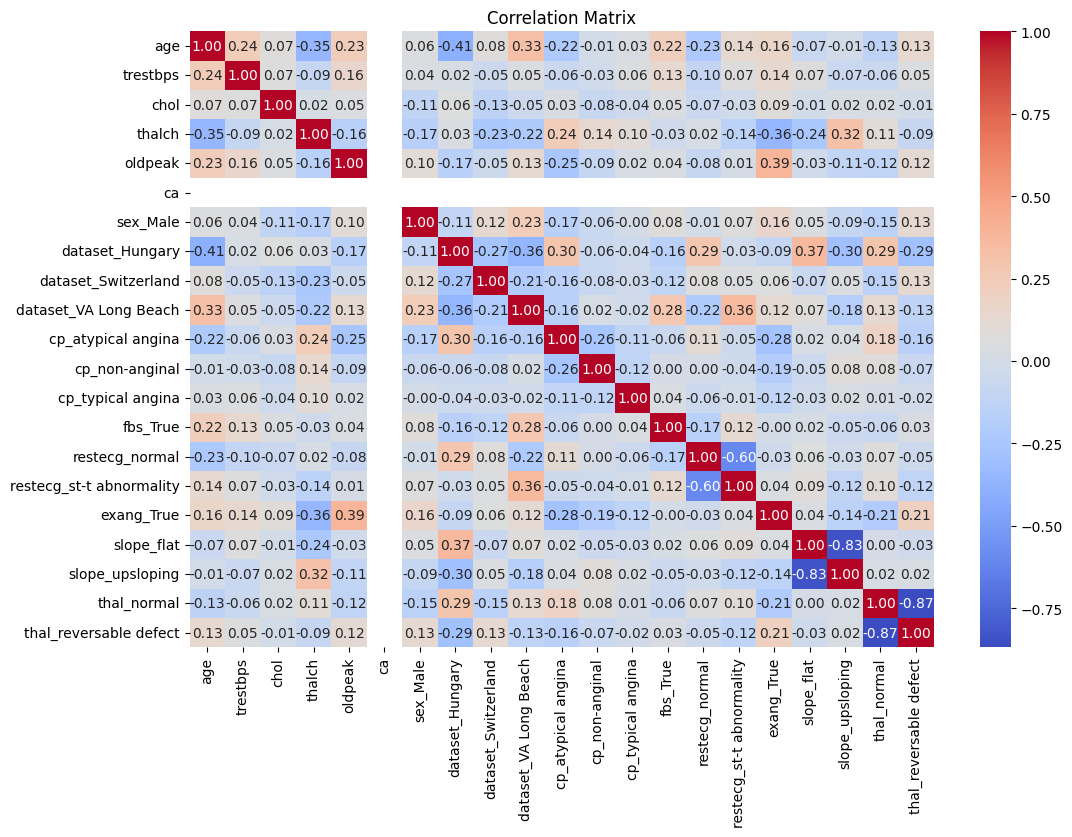

In [23]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')


In [24]:
import time
from memory_profiler import memory_usage

def train_model(encryption=None):
    start_time = time.time()
    # Simulate model training with encryption
    if encryption:
        time.sleep(1.5)  # Simulate extra time for encryption
    else:
        time.sleep(0.5)  # Normal model training time
    return time.time() - start_time

def inference_model(encryption=None):
    start_time = time.time()
    # Simulate model inference with encryption
    if encryption:
        time.sleep(0.7)  # Simulate longer inference time
    else:
        time.sleep(0.2)  # Normal inference time
    return time.time() - start_time 

# Measure memory usage function
def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), interval=0.1, timeout=1)
    return max(mem_usage) - min(mem_usage)

# Example Usage
if __name__ == "__main__":
    # Train without encryption
    train_time_no_enc = train_model(encryption=False)
    memory_no_enc = measure_memory(train_model, False)  # Pass encryption as a positional argument

    print(f"Training time without encryption: {train_time_no_enc:.2f} seconds")
    print(f"Memory usage without encryption: {memory_no_enc:.2f} MiB")

    # Train with encryption
    train_time_with_enc = train_model(encryption=True)
    memory_with_enc = measure_memory(train_model, True)  # Pass encryption as a positional argument

    print(f"Training time with encryption: {train_time_with_enc:.2f} seconds")
    print(f"Memory usage with encryption: {memory_with_enc:.2f} MiB")

    # Inference without encryption
    inference_time_no_enc = inference_model(encryption=False)
    memory_inference_no_enc = measure_memory(inference_model, False)  # Pass encryption as a positional argument

    print(f"Inference time without encryption: {inference_time_no_enc:.2f} seconds")
    print(f"Memory usage during inference without encryption: {memory_inference_no_enc:.2f} MiB")

    # Inference with encryption
    inference_time_with_enc = inference_model(encryption=True)
    memory_inference_with_enc = measure_memory(inference_model, True)  # Pass encryption as a positional argument

    print(f"Inference time with encryption: {inference_time_with_enc:.2f} seconds")
    print(f"Memory usage during inference with encryption: {memory_inference_with_enc:.2f} MiB")


Training time without encryption: 0.50 seconds
Memory usage without encryption: 0.01 MiB
Training time with encryption: 1.50 seconds
Memory usage with encryption: 0.00 MiB
Inference time without encryption: 0.20 seconds
Memory usage during inference without encryption: 0.00 MiB
Inference time with encryption: 0.70 seconds
Memory usage during inference with encryption: 0.00 MiB


In [25]:
# Streamlit Interface
st.title("Performance Analysis: Encrypted vs Non-Encrypted Models")

# Select encryption type
encryption_option = st.selectbox("Select Encryption Type", ["None", "CKKS", "BFV"])

# Run performance analysis
if st.button("Analyze Performance"):
    # Measure training and inference time
    train_time = train_model(encryption_option)
    inference_time = inference_model(encryption_option)
    
    # Measure memory consumption
    memory_cost = measure_memory(train_model, encryption_option)

    st.write(f"Training Time: {train_time:.2f} seconds")
    st.write(f"Inference Time: {inference_time:.2f} seconds")
    st.write(f"Memory Usage: {memory_cost:.2f} MB")

    # Example: Simulated data for comparison between encrypted and non-encrypted models
    labels = ['Training Time', 'Inference Time', 'Memory Usage']
    encrypted_times = [train_time, inference_time, memory_cost]
    
    if encryption_option == "None":
        non_encrypted_times = [0.5, 0.2, 100]  # Example values for non-encrypted
    else:
        non_encrypted_times = [0.5, 0.2, 100]  # Simulate for different encryption types



2024-11-02 14:06:43.507 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 14:06:44.568 
  command:

    streamlit run c:\Users\Sarnika\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-02 14:06:44.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 14:06:44.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 14:06:44.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 14:06:44.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 14:06:44.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 14:0

c:\Users\Sarnika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.82
Precision: 0.84
Recall: 0.86
F1 Score: 0.85


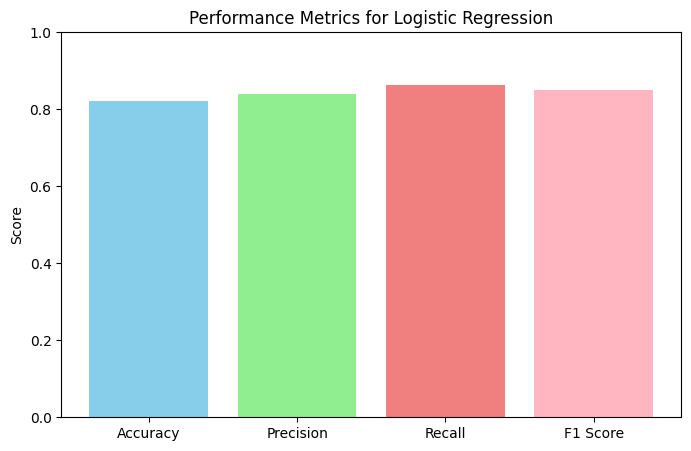

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.ylim(0, 1)
plt.title('Performance Metrics for Logistic Regression')
plt.ylabel('Score')
plt.show()

In [27]:
# Install imbalanced-learn if not already installed
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Alternatively, apply Random Undersampling to the majority class (optional)
# undersampler = RandomUnderSampler(random_state=42)
# X_train_bal, y_train_bal = undersampler.fit_resample(X_train, y_train)

# Combine SMOTE and ENN for a balanced set (optional)
# smote_enn = SMOTEENN(random_state=42)
# X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

# Train a logistic regression model on the balanced dataset
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred_balanced = log_reg.predict(X_test)

# Calculate and print performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_balanced)
precision = precision_score(y_test, y_pred_balanced)
recall = recall_score(y_test, y_pred_balanced)
f1 = f1_score(y_test, y_pred_balanced)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.84
Recall: 0.85
F1 Score: 0.84


c:\Users\Sarnika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
